## **Pose-Estimation to detect whether image is Full Shot or not**



**Landmark Map for Mediapipe**

<img src = https://mediapipe.dev/images/mobile/pose_tracking_full_body_landmarks.png>


## **How to use Pose-Estimation to check for full-shot images ?**

For the input image to be a full-shot image of a person, we will need to make sure that :
* The landmarks **1, 4, 29** and **30** should exist inside the frame of the image.(**NOTE : MediaPipe extrapolates the parts of human body which are not present inside the image frame**)

* To make sure that the model in the input image is standing erect, the distance between the pair of landmarks 1 and 29 and 4 and 30 should be greater than a threshold.


In [1]:
#Importing all necessary dependencies
import cv2
import mediapipe as mp
import numpy as np



class PoseEstimation :
    def __init__(self) :

        self.mp_pose = mp.solutions.pose                            # Initialize mediapipe pose class.
        self.mp_drawing = mp.solutions.drawing_utils                # Initialize mediapipe drawing class - to draw the landmarks points.
        self.mp_drawing_styles = mp.solutions.drawing_styles        # Initializing styles for landmarks and connections




    def findPosition(self,img ,draw=True):                          # The findPosition function here makes a list of lists containing data in the format : [landmark, x-coordinate, y-coordinate]

        #Create an empty list called lmlist
        self.lmList = []

        #Check if a human pose has been detected by the model
        if self.results.pose_landmarks:

            #Looping through the landmarks
            for id, lm in enumerate(self.results.pose_landmarks.landmark):

                #h, w, and c are the height, width and channels of the input image
                h, w, c = img.shape

                # cx and cy are actual x and y coordinates of each landmark, caclulated by the multiplying the normalized values of x and y coordinates with the width and height of the image
                cx, cy = int(lm.x * w), int(lm.y * h)

                # Append landmark id and its x and y coordinates to the list
                self.lmList.append([id, cx, cy])

        return self.lmList

    #The is_full_shot function checks if a given image is a full-shot image of a human or not
    def is_full_shot(self) :


        try :
          #Making sure that x-coordinate of each target landmark(1,4,29,30) is less than the width of the image
          if 0<= self.lmList[1][1] <= self.image.shape[1] and 0<= self.lmList[4][1] <= self.image.shape[1] and 0<= self.lmList[29][1] <= self.image.shape[1] and 0<= self.lmList[30][1] <= self.image.shape[1]  :

              #Making sure that y-coordinate of each target landmark(1,4,29,30) is less than the height of the image
              if 0<= self.lmList[1][2] <= self.image.shape[0] and 0<= self.lmList[4][1] <= self.image.shape[1] and 0<= self.lmList[29][2] <= self.image.shape[0] and 0<= self.lmList[30][2] <= self.image.shape[0] :

                  #Making sure that the distance between the pair of landmarks 1 and 29 and 4 and 30 should be greater than a threshold(width of the image/2)
                  if (abs(self.lmList[1][2] - self.lmList[29][2]) > (self.image.shape[1]/2)) and (abs(self.lmList[4][2] - self.lmList[30][2]) > (self.image.shape[1]/2))  :

                      return True                                    # Return True if the input image passes all the checks

        except :
          pass

        return False                                                 # Return False if the input image doesn't pass all the checks



    def pose_estimation(self, img_path) :

        # Setup the Pose function for video processing.
        with self.mp_pose.Pose(                                     # Initialize mediapipe drawing class - to draw the landmarks points.
            min_detection_confidence=0.5,                           # Minimum confidence value (between 0 and 1) from the pose-detection model for the detection to be considered successful.
            min_tracking_confidence=0.5) as pose:                   # Minimum confidence value (between 0 and 1) from the pose-tracking model for the landmarks to be considered tracked successfully

            # Read the image using opencv
            self.image = cv2.imread(img_path)

            # Make a copy of the image
            before_image = self.image.copy()

            # Converting the image from BGR to RGB format for pose-estimation(OpenCV uses BGR format while MediaPipe uses RGB format)
            self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

            # Get the coordinates of all the landmarks
            self.results = pose.process(self.image)

            # Using the findPosition function to get an array of all the cordinates
            self.lmList = self.findPosition(self.image)

            # Making the image writeable
            self.image.flags.writeable = True

            # Converting the image back to BGR format for drawing pose annotations
            self.image = cv2.cvtColor(self.image, cv2.COLOR_RGB2BGR)

            # Draw the pose annotation on the image.
            self.mp_drawing.draw_landmarks(
                self.image,
                self.results.pose_landmarks,                      # pose_landmarks returns the coordinates of all the landmarks
                self.mp_pose.POSE_CONNECTIONS,                    # POSE_CONNECTIONS returns the coordinates of the connections between the landmarks
                landmark_drawing_spec=self.mp_drawing_styles.get_default_pose_landmarks_style())

            if self.is_full_shot() :
              return [True, before_image, self.image]
            else:
              return [False, before_image, self.image]

            #return the image before and after pose estimation



In [2]:
#Lets give the paths of images we want to test our pose estimation on
img_path_1 = "./Examples/NotFullShot_Example6.jpg"
img_path_2 = "./Examples/FullShot_Example5.jpg"
img_path_3 = "./Examples/NotFullShot_Example1.jpg"
img_path_4 = "./Examples/FullShot_Example6.jpg"



In [3]:
#Lets first create a instance of our class
ps = PoseEstimation()


In [4]:
#Plot sample image 1
[full_shot, before_image, after_image ] = ps.pose_estimation(img_path_1)
print(f"Image is Full Shot: {full_shot}")



Image is Full Shot: False


In [6]:
#Now we also want to see before and after image of pose estimation
#So lets write a function for it

# Importing necessary dependencies
import matplotlib.pyplot as plt


def plot_mediapipe(before_image, after_image) :

  #Create a new figure using matplotlib
  fig = plt.figure(figsize=(10, 7))

  #add a subplot
  fig.add_subplot(1, 2, 1)

  #Plot the input image on the left
  plt.imshow(cv2.cvtColor(before_image, cv2.COLOR_BGR2RGB), cmap = "gray")
  # Enabling axis and labels
  plt.axis('On')
  # Setting title as Before
  plt.title("Before")

  #add a subplot
  fig.add_subplot(1, 2, 2)

  #Plot the output image on the right
  plt.imshow(cv2.cvtColor(after_image, cv2.COLOR_BGR2RGB), cmap = "gray")
  # Enabling axis and labels
  plt.axis('On')
  # Setting title as After
  plt.title("After")

  # Show the figure
  plt.show()


Image is Full Shot: False


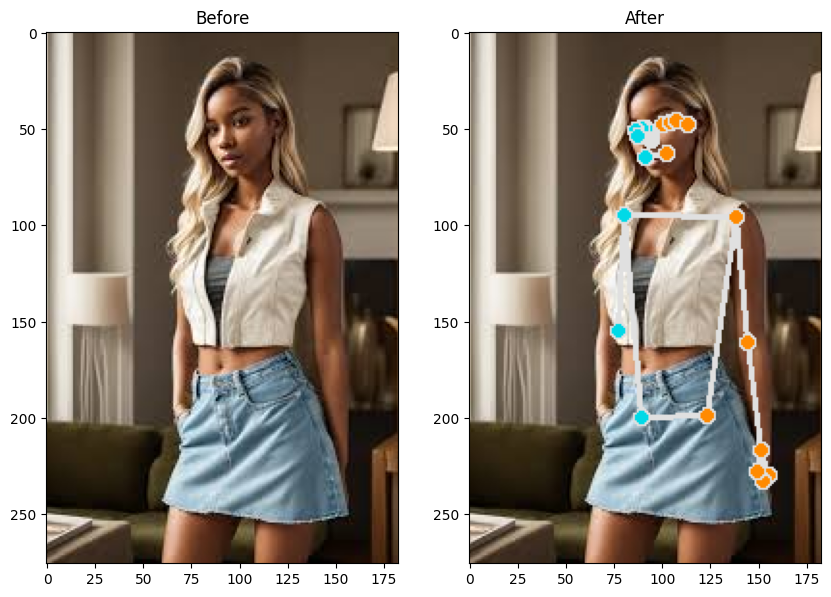

In [7]:
#Plot sample image 1
[full_shot, before_image, after_image ] = ps.pose_estimation(img_path_1)
print(f"Image is Full Shot: {full_shot}")
plot_mediapipe(before_image, after_image)

Image is Full Shot: False


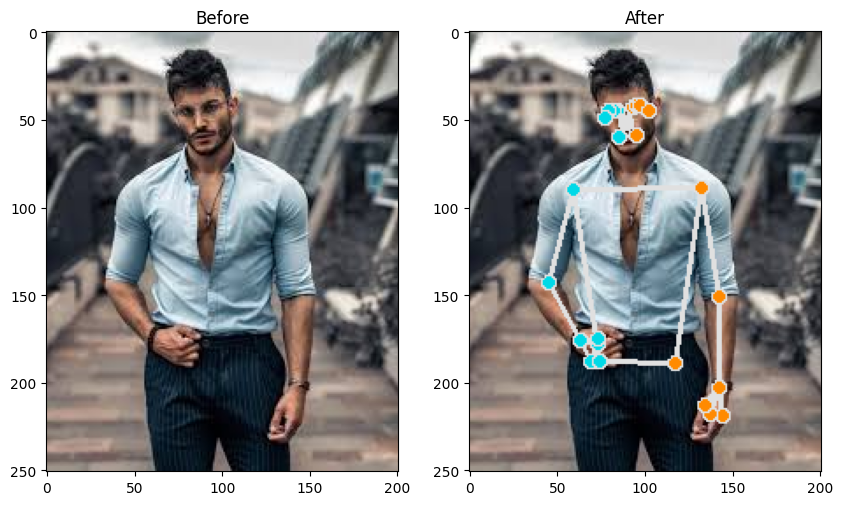

In [8]:
#Plot sample image 3
[full_shot, before_image, after_image ] = ps.pose_estimation(img_path_3)
print(f"Image is Full Shot: {full_shot}")
plot_mediapipe(before_image, after_image)

Image is Full Shot: True


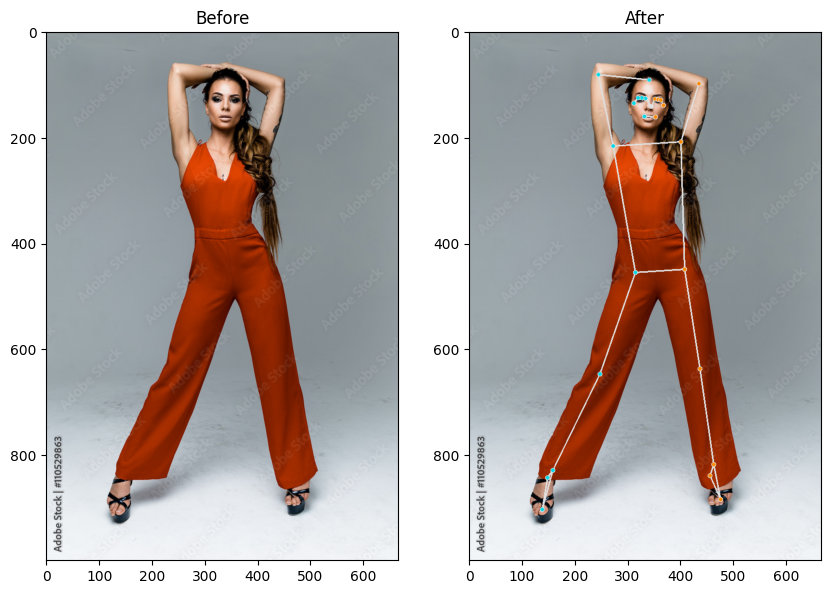

In [9]:
#Plot sample image 4
[full_shot, before_image, after_image ] = ps.pose_estimation(img_path_4)
print(f"Image is Full Shot: {full_shot}")
plot_mediapipe(before_image, after_image)

Image is Full Shot: True


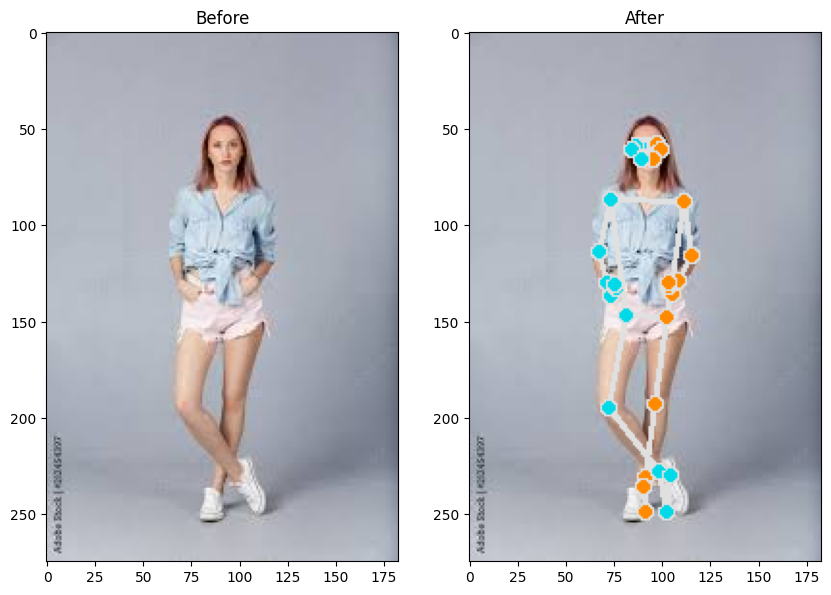

In [10]:
#Plot sample image 2
[full_shot, before_image, after_image ] = ps.pose_estimation(img_path_2)
print(f"Image is Full Shot: {full_shot}")
plot_mediapipe(before_image, after_image)

In [16]:
img_path_5 = "./Examples/FullShot_Example2.jpg"
img_path_6 = "./Examples/NotFullShot_Example2.jpg"
img_path_7 = "./Examples/FullShot_Example4.jpg"


Image is Full Shot: True


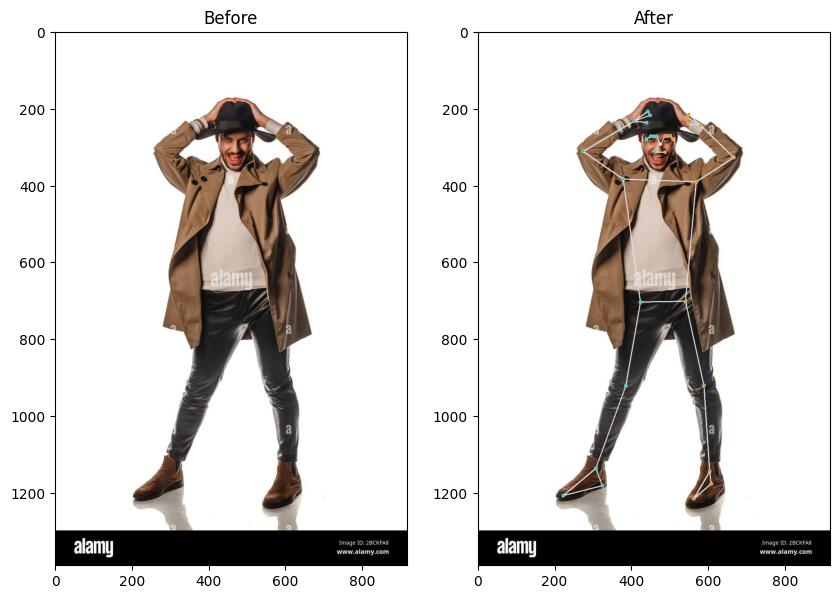

In [12]:
#Plot sample image 5
[full_shot, before_image, after_image ] = ps.pose_estimation(img_path_5)
print(f"Image is Full Shot: {full_shot}")
plot_mediapipe(before_image, after_image)

Image is Full Shot: False


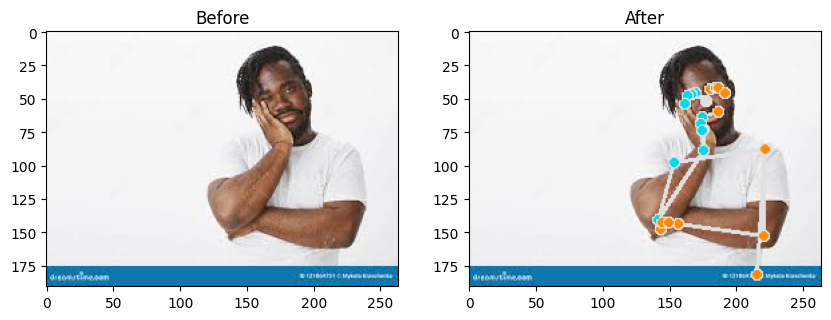

In [13]:
#Plot sample image 6
[full_shot, before_image, after_image ] = ps.pose_estimation(img_path_6)
print(f"Image is Full Shot: {full_shot}")
plot_mediapipe(before_image, after_image)

Image is Full Shot: True


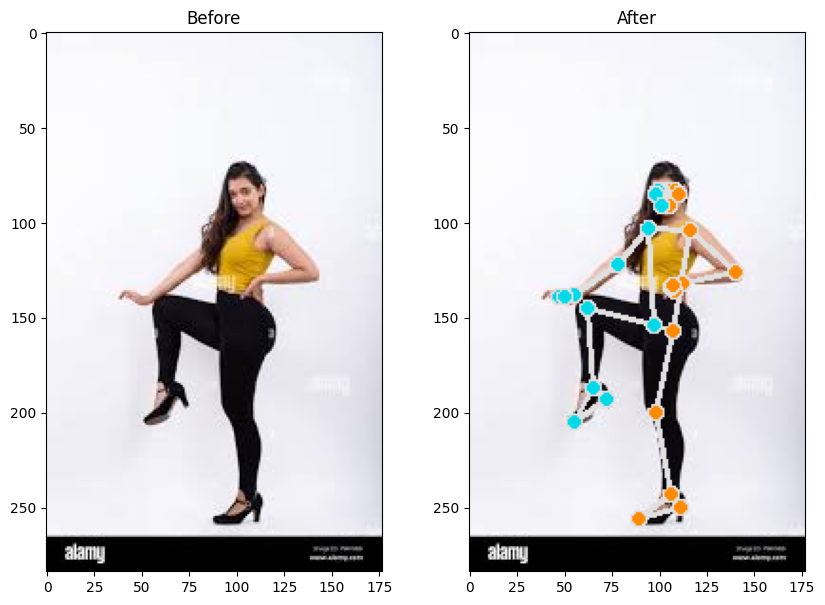

In [17]:
#Plot sample image 7
[full_shot, before_image, after_image ] = ps.pose_estimation(img_path_7)
print(f"Image is Full Shot: {full_shot}")
plot_mediapipe(before_image, after_image)